Cost function Blog -> https://medium.com/@anishnama20/understanding-cost-functions-in-machine-learning-types-and-applications-cd7d8cc4b47d


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

0.6800000000000002


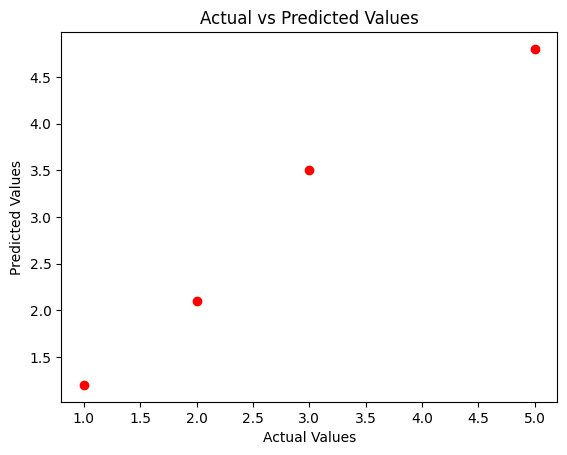

In [36]:
# Cost function (M.S.E)

# Predicted and actual values
y_pred = np.array([1.2, 2.1, 3.5, 4.8])
y_actual = np.array([1, 2, 3, 5])
# Plotting the actual vs predicted values
plt.scatter(y_actual, y_pred, color='red', label='Predicted vs Actual')
# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
#now we will find m.s.e to plot best fit line
n = len(y_pred)
mse = (1/2*n)*(np.sum((y_actual-y_pred)**2))
print(mse)

Mean Squared Error (MSE): 0.08500000000000002
0.9142857142857141 0.3857142857142849
y_fit [1.3        2.21428571 3.12857143 4.95714286]


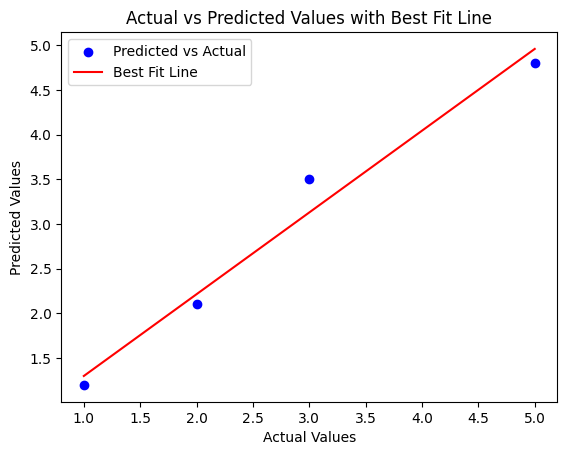

In [37]:
import numpy as np
import matplotlib.pyplot as plt
y_pred = np.array([1.2, 2.1, 3.5, 4.8])
y_actual = np.array([1, 2, 3, 5])
# Step 1: Calculate Mean Squared Error (MSE)
mse = np.mean((y_pred - y_actual)**2)
print(f"Mean Squared Error (MSE): {mse}")
# step 2 and 3 have to study later
# Step 2: Fit a line (Best Fit Line) using np.polyfit (degree 1 for linear fit)
slope, intercept = np.polyfit(y_actual, y_pred, 1)
print(slope,intercept)
# Step 3: Generate the line of best fit
y_fit = slope * y_actual + intercept
print('y_fit',y_fit)
# Plotting the actual vs predicted values
plt.scatter(y_actual, y_pred, color='blue', label='Predicted vs Actual')

# Plotting the best fit line
plt.plot(y_actual, y_fit, color='red', label='Best Fit Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [38]:
sl ,inte = 0,0
x = np.array([1,2,3])
y = np.array([inte*i for i in x]) #list comprehension
n = len(x)
cf = (1/(2*n))*(np.sum((y-x)**2))
print(cf)

2.333333333333333


In [39]:
df = pd.read_csv('height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [40]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [41]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


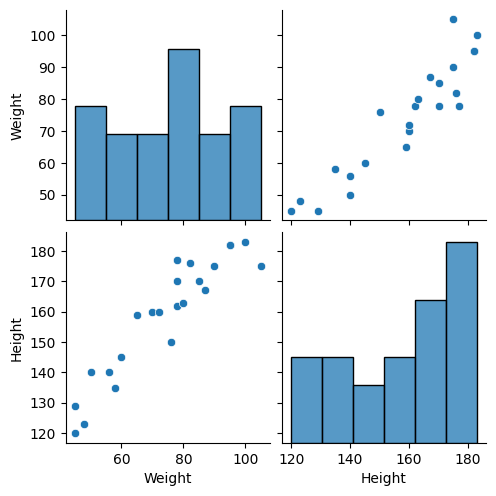

In [42]:
sns.pairplot(df)

Text(0.5, 1.0, 'Scatter plot')

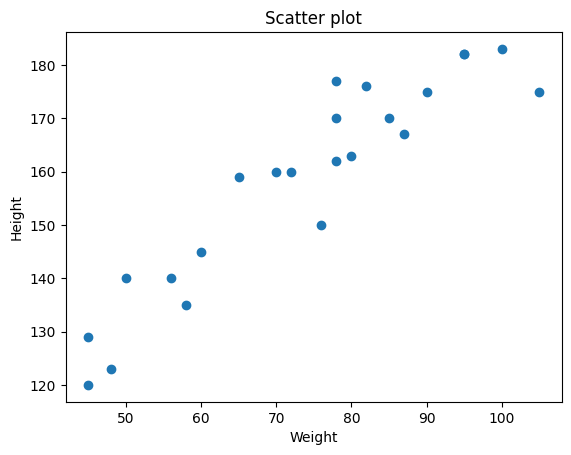

In [43]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Scatter plot')

In [44]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


This is a regression problem because output value is continuos

In [45]:
# Step:1  Divide dataset into independent and dependent features
X = df[['Weight']] # Independent feature should be in dataframe or 2d array
y = df['Height'] # this can be series or 1d array np.array()


In [46]:
# Step:2 Train test split
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [47]:
X_train.shape

(17, 1)

In [48]:
y_train.shape

(17,)

In [49]:
y_test.shape

(6,)

In [50]:
X_test.shape

(6, 1)

Step:3  now we will do standerdisation beacasue all the features will be on same scale and All columns have similar value ranges(but it is sensitive to outliers)

e.g 

Age (scaled)	Salary (scaled)

-1.22	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -1.00

0.00	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.00

1.22	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.00

isme almost sbhi same scale par hai agar koi bada chota hota to machine would have considered that this particular feature is more important

agar ye nhi krege to sab kuch bigger value k sath hoga which is not a good solution as it will take more time to reach global minima



fit_transform vs transform vs fit

fit_transform me data usi particular ka calculate hota hai and transform me dono ka.agar hum fit_transform krte hai test me to model will know about our test info that we don't want to leek that's why we used transform so that it will use train ka mean /std.

fit -> calc. mean and std  and see pattern

transform -> jo fit se sikha use apply 

fit_transform -> fit + transform



In [51]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train) # on train data
X_test = scaler.transform(X_test) # fit transform se jo fit hua u and sigma vhi use lr lega 



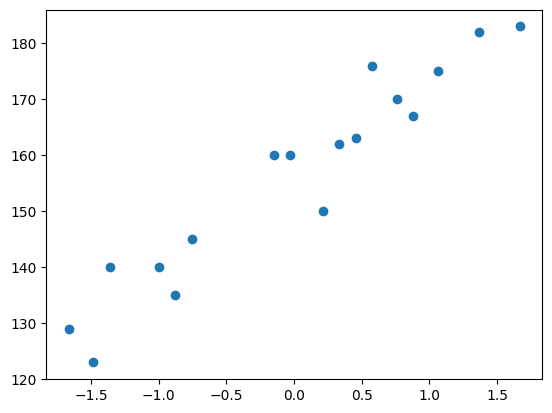

In [52]:
plt.scatter(X_train,y_train)

In [53]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [54]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [55]:
y_train

1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [56]:
# step:4 Apply linear regression model
from sklearn.linear_model import LinearRegression

In [57]:
regression = LinearRegression(n_jobs=-1) #-1 means using all processors

In [58]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [76]:
type(X_train)


numpy.ndarray

In [77]:
print('cofficient/slope: ',regression.coef_)
print('INTERCEPT: ',regression.intercept_)
# print('INTERCEPT: ',regressor.n_features_in_)

cofficient/slope:  [17.2982057]
INTERCEPT:  156.47058823529412


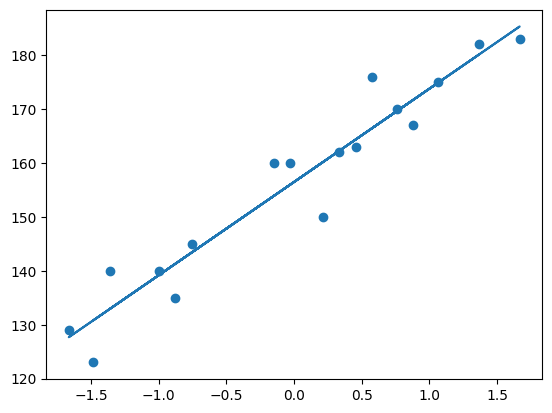

In [82]:
# step:5 Training data plot for best fit line
plt.scatter(X_train,y_train) 
plt.plot(X_train,regression.predict(X_train))

### Prediction for test data
1. Predicted height output =  intercept + coef_(Weights)
2. y_pred_test  = 156.470 + 17.29(X_test)


In [90]:
y_pred =regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [91]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

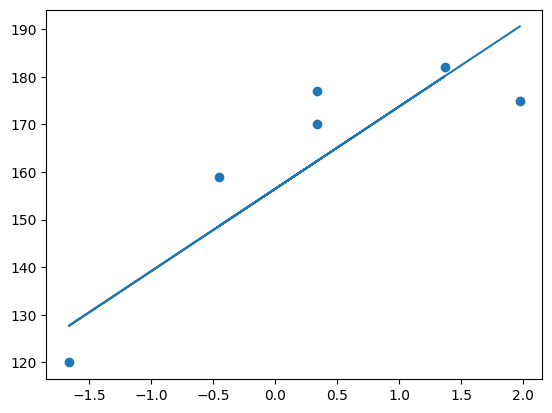

In [92]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test))

In [93]:
# performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_pred)  # might  be lot of outliers
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


114.84069295228699
9.66512588679501
10.716374991212605


### R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [95]:
from sklearn.metrics import r2_score

In [68]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [69]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [ ]:
X_test.shape[1] # no of independernt features

1

In [70]:
## ols


In [71]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train,X_train).fit()

In [103]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [99]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [100]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 16 May 2025   Prob (F-statistic):                       0.664
Time:                        14:55:05   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/navneetsharma/Desktop/Data Science/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [105]:
# prediction for new data 
print(regression.predict([[72]]))  # missed standerisation
print(regression.predict(scaler.transform([[72]])))  # now it will be correct
print(regression.predict(scaler.transform([[78]])))  # now it will be correct


[1401.94139895]
[155.97744705]
[162.26499721]


/home/navneetsharma/Desktop/Data Science/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/navneetsharma/Desktop/Data Science/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
